In [5]:
# ==========================================
# 1. BINARY SEARCH TREE (BST) - FULL VERSION
# ==========================================
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    # --- INSERT ---
    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        if key < current_node.key:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        elif key > current_node.key:
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert_recursive(current_node.right, key)

    # --- SEARCH ---
    def search(self, key):
        return self._search_recursive(self.root, key)

    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

    # --- DELETE ---
    def delete(self, key):
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, node, key):
        if node is None: return node
        
        if key < node.key:
            node.left = self._delete_recursive(node.left, key)
        elif key > node.key:
            node.right = self._delete_recursive(node.right, key)
        else:
            # Node with only one child or no child
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            # Node with two children: Get inorder successor (smallest in right subtree)
            temp = self._min_value_node(node.right)
            node.key = temp.key
            node.right = self._delete_recursive(node.right, temp.key)
        return node

    # --- MIN / MAX ---
    def find_min(self):
        node = self._min_value_node(self.root)
        return node.key if node else None

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def find_max(self):
        current = self.root
        if not current: return None
        while current.right:
            current = current.right
        return current.key

    # --- TRAVERSALS ---
    def inorder(self):
        res = []
        self._inorder_rec(self.root, res)
        return res
    def _inorder_rec(self, node, res):
        if node:
            self._inorder_rec(node.left, res)
            res.append(node.key)
            self._inorder_rec(node.right, res)

    def preorder(self):
        res = []
        self._preorder_rec(self.root, res)
        return res
    def _preorder_rec(self, node, res):
        if node:
            res.append(node.key)
            self._preorder_rec(node.left, res)
            self._preorder_rec(node.right, res)

    def postorder(self):
        res = []
        self._postorder_rec(self.root, res)
        return res
    def _postorder_rec(self, node, res):
        if node:
            self._postorder_rec(node.left, res)
            self._postorder_rec(node.right, res)
            res.append(node.key)

    def bfs(self): # Width traversal
        if not self.root: return []
        queue = [self.root]
        res = []
        while queue:
            node = queue.pop(0)
            res.append(node.key)
            if node.left: queue.append(node.left)
            if node.right: queue.append(node.right)
        return res

    # --- HEIGHT (Required for graphs) ---
    def get_height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        return 1 + max(self._height_recursive(node.left), self._height_recursive(node.right))

In [1]:
import random
import matplotlib.pyplot as plt

# 1. The Node Class
class Node:
    def __init__(self, key):
        self.key = key      # The number inside the box
        self.left = None    # The arrow pointing left
        self.right = None   # The arrow pointing right

# 2. The Tree Class
class BST:
    def __init__(self):
        self.root = None

    # INSERT OPERATION
    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        # If key is smaller, go left
        if key < current_node.key:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        # If key is bigger, go right
        elif key > current_node.key:
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert_recursive(current_node.right, key)
        # If key is equal, do nothing (duplicates not allowed in this lab)

    # HEIGHT OPERATION (Needed for Task 4)
    def get_height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        # Height = 1 + whichever side is taller
        left_h = self._height_recursive(node.left)
        right_h = self._height_recursive(node.right)
        return 1 + max(left_h, right_h)

# TEST IT
# Let's verify it works before moving on
my_tree = BST()
numbers = [10, 5, 15, 3, 7, 12, 18]
print(f"Inserting numbers: {numbers}")

for n in numbers:
    my_tree.insert(n)

print(f"Tree Height: {my_tree.get_height()}") 
# Expected height is 3 (10 -> 5 -> 3)

Inserting numbers: [10, 5, 15, 3, 7, 12, 18]
Tree Height: 3


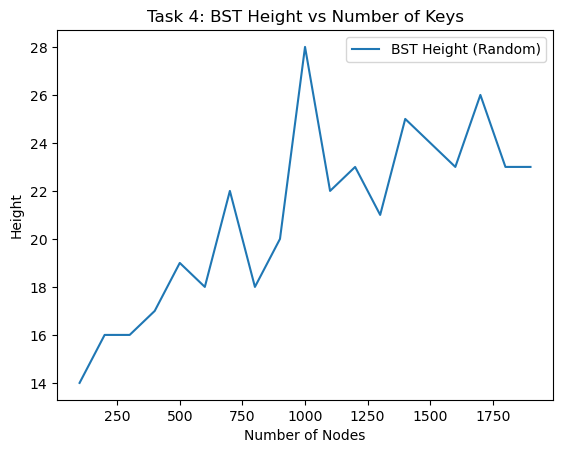

In [2]:
def run_experiment_random():
    sizes = range(100, 2000, 100) # Test with 100 nodes, 200 nodes... up to 2000
    heights = []

    for n in sizes:
        tree = BST()
        # Generate random unique numbers
        keys = random.sample(range(1, n * 10), n)
        for k in keys:
            tree.insert(k)
        heights.append(tree.get_height())

    plt.plot(sizes, heights, label="BST Height (Random)")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Height")
    plt.title("Task 4: BST Height vs Number of Keys")
    plt.legend()
    plt.show()

# Run the experiment
run_experiment_random()